# Wrangle

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 


In [2]:
df = pd.read_csv('311.csv')

In [3]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,8/15/2012,8/30/2012,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,5/15/2020,5/15/2021
1,Property Maintenance,1010888252,6/6/2013,8/9/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,5/15/2020,5/15/2021
2,Property Maintenance,1010966128,7/19/2013,9/23/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,5/15/2020,5/15/2021
3,Property Maintenance,1011052825,9/16/2013,9/30/2013,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,5/15/2020,5/15/2021
4,Property Maintenance,1011052826,9/16/2013,9/30/2013,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,5/15/2020,5/15/2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

In [5]:
df.describe()

,CASEID,Council District,XCOORD,YCOORD
count,4.954400e+05,495440.000000,4.953450e+05,4.953450e+05
mean,1.016457e+09,4.761099,2.120971e+06,1.371271e+07
std,3.836717e+05,2.809984,2.666102e+04,2.715970e+04
min,1.010444e+09,0.000000,2.029622e+06,1.359464e+07
25%,1.016290e+09,2.000000,2.104087e+06,1.369342e+07
50%,1.016462e+09,5.000000,2.121784e+06,1.370894e+07
75%,1.016691e+09,7.000000,2.139919e+06,1.373111e+07
max,1.016871e+09,10.000000,2.235998e+06,1.381636e+07


In [6]:
df.shape

(495440, 17)

In [7]:
df.isna().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
dtype: int64

ACQUIRE SUMMARY:
- change column names to be more readable by humans
- lowercase column names
- set case id as index
- change council district, xcoord, and ycoord to strings
- columns to add:
    - zip code
    - days case has been open
    - 

In [37]:
#value counts for all columns
for i in df.columns:
    x = df[i].value_counts()
    print('Column: ', i ,'\n','Values:','\n', x)
    print('-------------------------------------------')

Column:  CASEID 
 Values: 
 1016854574    4
1016847415    4
1016775925    4
1016865339    4
1016864013    4
             ..
1016617054    1
1016615007    1
1016705123    1
1016694884    1
1016084487    1
Name: CASEID, Length: 487597, dtype: int64
-------------------------------------------
Column:  OPENEDDATETIME 
 Values: 
 5/20/2020     3364
5/21/2020     2917
5/27/2020     2860
5/26/2020     2655
5/3/2021      2482
              ... 
11/7/2014        1
12/2/2017        1
7/20/2016        1
11/8/2013        1
11/18/2016       1
Name: OPENEDDATETIME, Length: 1872, dtype: int64
-------------------------------------------
Column:  SLA_Date 
 Values: 
 1/7/2021      3465
1/11/2021     2635
3/29/2021     2212
12/3/2020     2162
4/5/2021      2122
              ... 
6/11/2014        1
11/11/2014       1
4/20/2016        1
1/21/2015        1
10/1/2014        1
Name: SLA_Date, Length: 1955, dtype: int64
-------------------------------------------
Column:  CLOSEDDATETIME 
 Values: 
 5/27/2020

In [9]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,8/15/2012,8/30/2012,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,5/15/2020,5/15/2021
1,Property Maintenance,1010888252,6/6/2013,8/9/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,5/15/2020,5/15/2021
2,Property Maintenance,1010966128,7/19/2013,9/23/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,5/15/2020,5/15/2021
3,Property Maintenance,1011052825,9/16/2013,9/30/2013,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,5/15/2020,5/15/2021
4,Property Maintenance,1011052826,9/16/2013,9/30/2013,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,5/15/2020,5/15/2021


In [10]:
df.columns.to_list()

['Category',
 'CASEID',
 'OPENEDDATETIME',
 'SLA_Date',
 'CLOSEDDATETIME',
 'Late (Yes/No)',
 'Dept',
 'REASONNAME',
 'TYPENAME',
 'CaseStatus',
 'SourceID',
 'OBJECTDESC',
 'Council District',
 'XCOORD',
 'YCOORD',
 'Report Starting Date',
 'Report Ending Date']

### Category

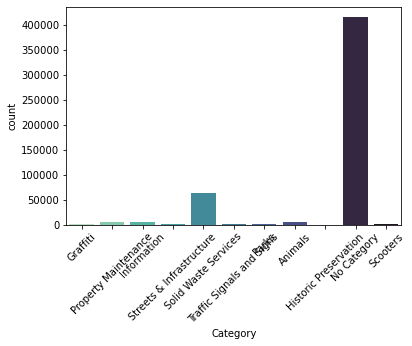

In [11]:

sns.countplot(x='Category', data=df, palette='mako_r')
plt.xticks(rotation=45)
plt.show()

### Late


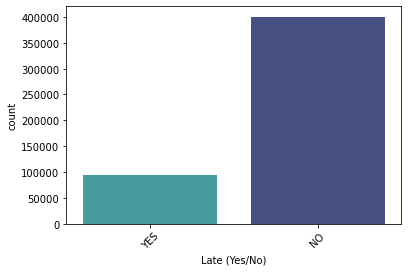

In [12]:
sns.countplot(x='Late (Yes/No)', data=df, palette='mako_r')
plt.xticks(rotation=45)
plt.show()

### Department

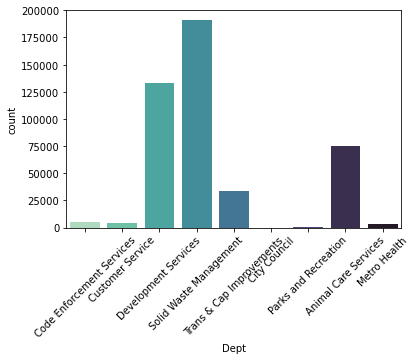

In [13]:

sns.countplot(x='Dept', data=df, palette='mako_r')
plt.xticks(rotation=45)
plt.show()

### Reason

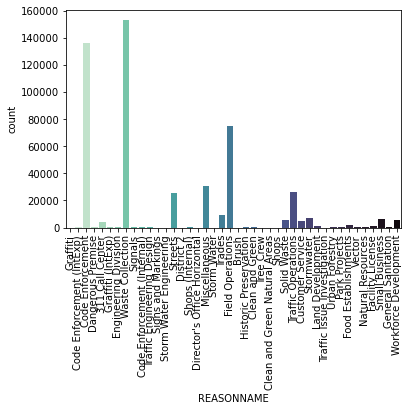

In [14]:
sns.countplot(x='REASONNAME', data=df, palette='mako_r')
plt.xticks(rotation=90)
plt.show()

### Case Status

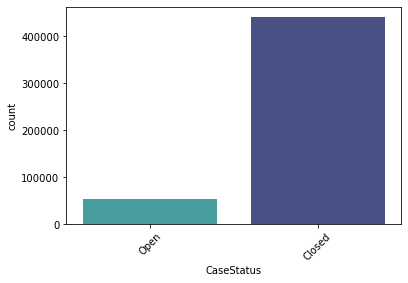

In [15]:

sns.countplot(x='CaseStatus', data=df, palette='mako_r')
plt.xticks(rotation=45)
plt.show()

### Source of Information

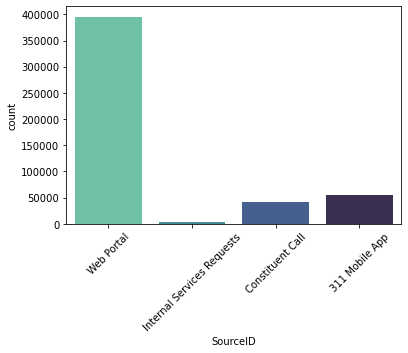

In [16]:
sns.countplot(x='SourceID', data=df, palette='mako_r')
plt.xticks(rotation=45)
plt.show()

### SA District

<AxesSubplot:xlabel='Council District', ylabel='count'>

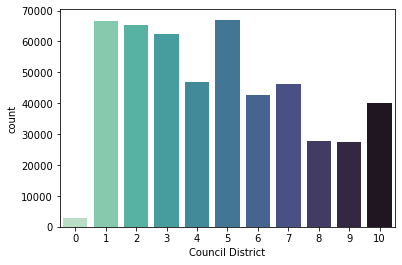

In [17]:
sns.countplot(x='Council District', data=df, palette='mako_r')



In [18]:
df.Dept.value_counts()

Solid Waste Management       190658
Development Services         132826
Animal Care Services          75222
Trans & Cap Improvements      33684
Code Enforcement Services      5294
Customer Service               4196
Metro Health                   2827
Parks and Recreation            433
City Council                      1
Name: Dept, dtype: int64

In [19]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,8/15/2012,8/30/2012,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,5/15/2020,5/15/2021
1,Property Maintenance,1010888252,6/6/2013,8/9/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,5/15/2020,5/15/2021
2,Property Maintenance,1010966128,7/19/2013,9/23/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,5/15/2020,5/15/2021
3,Property Maintenance,1011052825,9/16/2013,9/30/2013,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,5/15/2020,5/15/2021
4,Property Maintenance,1011052826,9/16/2013,9/30/2013,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,5/15/2020,5/15/2021


### Lori's Funcitons
- Drop category due to overweling amount of non cateogrized
- Setting case id as index
- Drop start and end year due to unhelpfulness

In [20]:
df.columns.to_list()

['Category',
 'CASEID',
 'OPENEDDATETIME',
 'SLA_Date',
 'CLOSEDDATETIME',
 'Late (Yes/No)',
 'Dept',
 'REASONNAME',
 'TYPENAME',
 'CaseStatus',
 'SourceID',
 'OBJECTDESC',
 'Council District',
 'XCOORD',
 'YCOORD',
 'Report Starting Date',
 'Report Ending Date']

In [21]:
# Drop category, report starting date, and report ending date
# df.drop(columns=['Category', 
                 #'Report Starting Date', 
                 #'Report Ending Date' ], inplace=True)

In [22]:
# Set index to case id
# df.set_index('CASEID')

In [23]:
# df.head()

In [24]:
def drop_and_index(df):
    """
    This function will take in one positional argurment:
    1.  311 df
    This function will perform the following operations to the df:
    1.  Drop category, drop report starting date, and drop report
    ending date
    2.  Set CASEID as the index
    """
    # Drop category, report starting date, and report ending date
    df.drop(columns=['Category', 
                 'Report Starting Date', 
                 'Report Ending Date' ], inplace=True)
    # Set index to case id
    df.set_index('CASEID')
    
    return df

In [25]:
drop_and_index(df)

,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD
0,1010444245,8/15/2012,8/30/2012,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0
1,1010888252,6/6/2013,8/9/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0
2,1010966128,7/19/2013,9/23/2013,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0
3,1011052825,9/16/2013,9/30/2013,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0
4,1011052826,9/16/2013,9/30/2013,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495435,1016870502,5/14/2021,9/24/2021,NaN,NO,Development Services,Code Enforcement,Illegal Parking (ROW Obstruction),Open,Constituent Call,"2721 N PINE ST, SAN ANTONIO, 78209",2,2136964.0,13712340.0
495436,1016870503,5/14/2021,7/22/2021,NaN,NO,Development Services,Code Enforcement,Junk Vehicle,Open,Web Portal,"423 MERRY ANN DR, SAN ANTONIO, 78223",3,2139580.0,13687373.0
495437,1016870504,5/14/2021,5/16/2021,NaN,NO,Solid Waste Management,Miscellaneous,Dead Animal Pick Up,Open,Constituent Call,"720 W PYRON AVE, SAN ANTONIO",3,2125041.0,13679733.0
495438,1016870505,5/14/2021,5/16/2021,NaN,NO,Solid Waste Management,Miscellaneous,Dead Animal Pick Up,Open,Constituent Call,"807 PORTER ST, SAN ANTONIO, 78210",2,2142321.0,13695635.0


In [38]:
df['Council District'].value_counts()



5     67022
1     66543
2     65327
3     62330
4     46830
7     46377
6     42719
10    40062
8     27924
9     27473
0      2833
Name: Council District, dtype: int64

In [ ]:
df.dropna(subset=['level_of_delay'], how='all', inplace=True)